# Cosine similarity

In [1]:
from sentence_transformers import SentenceTransformer, util

In [4]:
# 1. Load a pre-trained "Semantic" model
model = SentenceTransformer('all-MiniLM-L6-v2')

## Experiment 1: Similarity between Bus, Car and Apple

In [9]:
# 2. Define our words
words = ["Bus", "Car", "Apple"]

# 3. Calculate the Vectors (Embeddings)
vectors = model.encode(words)

# 4. Compare "Bus" (index 0) to "Car" (index 1)
sim_bus_car_e1 = util.cos_sim(vectors[0], vectors[1])

# 5. Compare "Bus" (index 0) to "Apple" (index 2)
sim_bus_apple = util.cos_sim(vectors[0], vectors[2])

# 6. Compare "Car" (index 1) to "Apple" (index 2)
sim_car_apple = util.cos_sim(vectors[1], vectors[2])

print('Results of Experiment 1:')
print(f"Similarity Bus-Car: {sim_bus_car_e1.item():.4f}")
print(f"Similarity Bus-Apple: {sim_bus_apple.item():.4f}")
print(f"Similarity Car-Apple: {sim_car_apple.item():.4f}")

Resutls of Experiment 1:
Similarity Bus-Car: 0.4957
Similarity Bus-Apple: 0.2100
Similarity Car-Apple: 0.4098


## Experiment 2: Similarity between Bus, Car and Banana

In [10]:
# 2. Define our words
words = ["Bus", "Car", "Banana"]

# 3. Calculate the Vectors (Embeddings)
vectors = model.encode(words)

# 4. Compare "Bus" (index 0) to "Car" (index 1)
sim_bus_car_e2 = util.cos_sim(vectors[0], vectors[1])

# 5. Compare "Bus" (index 0) to "Banana" (index 2)
sim_bus_banana = util.cos_sim(vectors[0], vectors[2])

# 6. Compare "Car" (index 1) to "Banana" (index 2)
sim_car_banana = util.cos_sim(vectors[1], vectors[2])

print('Results of Experiment 2:')
print(f"Similarity Bus-Car: {sim_bus_car_e2.item():.4f}")
print(f"Similarity Bus-Banana: {sim_bus_banana.item():.4f}")
print(f"Similarity Car-Banana: {sim_car_banana.item():.4f}")

Resutls of Experiment 2:
Similarity Bus-Car: 0.4957
Similarity Bus-Banana: 0.3135
Similarity Car-Banana: 0.3899


## Experiment 3: Similarity betweeen Bus, Car & Tuesday

In [11]:
# 2. Define our words
words = ["Bus", "Car", "Tuesday"]

# 3. Calculate the Vectors (Embeddings)
vectors = model.encode(words)

# 4. Compare "Bus" (index 0) to "Car" (index 1)
sim_bus_car_e3 = util.cos_sim(vectors[0], vectors[1])

# 5. Compare "Bus" (index 0) to "Tuesday" (index 2)
sim_bus_tuesday = util.cos_sim(vectors[0], vectors[2])

# 6. Compare "Car" (index 1) to "Tuesday" (index 2)
sim_car_tuesday = util.cos_sim(vectors[1], vectors[2])

print('Results of Experiment 3:')
print(f"Similarity Bus-Car: {sim_bus_car_e3.item():.4f}")
print(f"Similarity Bus-Tuesday: {sim_bus_tuesday.item():.4f}")
print(f"Similarity Car-Tuesday: {sim_car_tuesday.item():.4f}")

Resutls of Experiment 3:
Similarity Bus-Car: 0.4957
Similarity Bus-Tuesday: 0.2040
Similarity Car-Tuesday: 0.2238


## Comparing the results

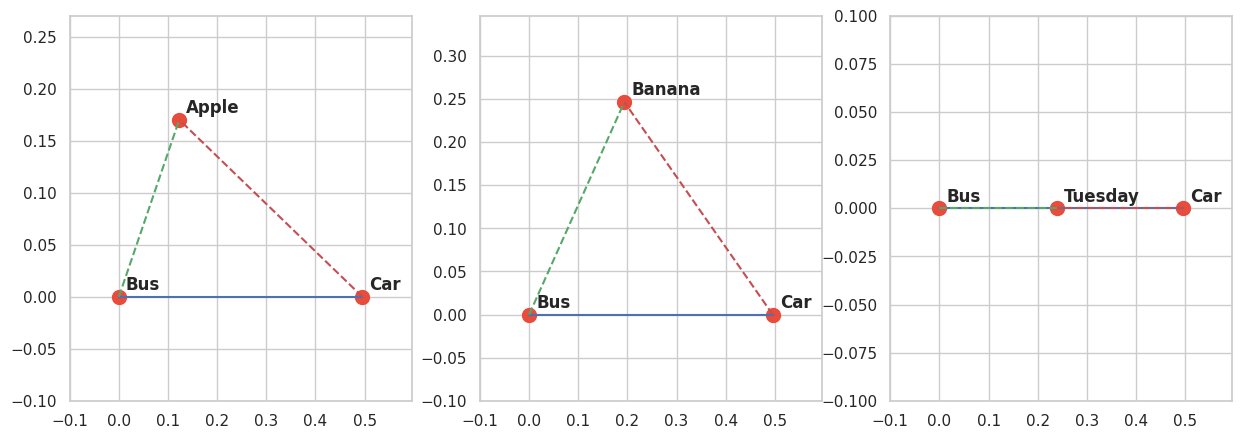

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# --- SEMANTIC MAP (GEOMETRIC TRIANGLES) ---
# This calculates 2D coordinates based on similarity (distance)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
experiments = [
    ("Exp 1", "Apple", sim_bus_car_e1.numpy()[0][0], sim_bus_apple.numpy()[0][0], sim_car_apple.numpy()[0][0]),
    ("Exp 2", "Banana", sim_bus_car_e2.numpy()[0][0], sim_bus_banana.numpy()[0][0], sim_car_banana.numpy()[0][0]),
    ("Exp 3", "Tuesday", sim_bus_car_e3.numpy()[0][0], sim_bus_tuesday.numpy()[0][0], sim_car_tuesday.numpy()[0][0])
]

for i, (name, target, bc, bt, ct) in enumerate(experiments):
    # Using the Law of Cosines to find coordinates (x, y)
    # so that distances between points match the similarity scores
    x_val = (bt**2 + bc**2 - ct**2) / (2 * bc)
    y_val = np.sqrt(max(0, bt**2 - x_val**2))

    # Plot points
    axes[i].scatter([0, bc, x_val], [0, 0, y_val], color='#e74c3c', s=100)
    labels = ["Bus", "Car", target]
    for j, txt in enumerate(labels):
        axes[i].annotate(txt, ([0, bc, x_val][j], [0, 0, y_val][j]), xytext=(5,5), textcoords='offset points', fontweight='bold')

    # Draw lines between data points
    axes[i].plot([0, bc], [0, 0], 'b-')
    axes[i].plot([0, x_val], [0, y_val], 'g--')
    axes[i].plot([bc, x_val], [0, y_val], 'r--')

    # Add some padding to the x and y axes
    max_x = max([0, bc, x_val])
    max_y = max([0, y_val])
    axes[i].set_xlim(-0.1, max_x + 0.1)
    axes[i].set_ylim(-0.1, max_y + 0.1)